<h1><center>
     AIRBNB MADRID PROJECT
</center></h1>

![title](madrid.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
pd.set_option('display.max_columns', None)
from carbo import*



In [2]:
listing_df = pd.read_csv('listings_madrid.csv')
calendar_df = pd.read_csv('calendar_madrid.csv')

listing_copy = listing_df

# CRISP-DM PROCESS

## 1.- *Business Understanding*

This dataset is full of information about the accommodates avaible in Airbnb in the city of Madrid. With all this information we are going to ask ourself a few questions:<br>

Q1.-Is the quantity of accommodation offered equal all around Madrid?

Q2.-If a neighborhood group has a lot of accommodations, does it mean that each of its individual neighborhoods has them too? 

Q3.-Are the prices equal all over Madrid? 

Q4.-How are the prices and availability rates in Madrid over the next few months? 

Q5.-Finally, how well can we predict prices based on the rest of the features? For this task, I will fit a linear model that will estimate the price based on other features.


## 2.- *Data Understanding*

In [3]:
pd.set_option('display.max_columns', None) #To be able to see all the columns

In [4]:
listing_df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20220607181944,2022-06-07,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,https://www.airbnb.com/users/show/13660,Simon,2009-04-16,"Madrid, Community of Madrid, Spain","Gay couple, heterofriendly, enjoy having guest...",within a few hours,100%,84%,f,https://a0.muscache.com/im/pictures/user/1c793...,https://a0.muscache.com/im/pictures/user/1c793...,Hispanoamérica,1.0,1.0,"['email', 'phone']",t,t,NaN,Hispanoamérica,Chamartín,40.45724,-3.67688,Private room in rental unit,Private room,2,NaN,1 private bath,1.0,1.0,"[""Long term stays allowed"", ""Iron"", ""Heating"",...",$69.00,3,1125,1.0,21.0,8.0,1125.0,6.0,1122.5,NaN,t,5,12,22,92,2022-06-07,95,17,3,2010-03-14,2022-06-07,4.86,4.90,4.81,4.74,4.84,4.82,4.84,NaN,f,1,0,1,0,0.64
1,336672,https://www.airbnb.com/rooms/336672,20220607181944,2022-06-07,Great apartment ∞4 rooms∞ close to City Center,"Wonderful bright apartment near El Matadero, a...","Central neighborhood, 5 min walk from Madrid R...",https://a0.muscache.com/pictures/99a81a76-68f0...,1716726,https://www.airbnb.com/users/show/1716726,Jesús,2012-02-07,"Neuchâtel, Neuchâtel, Switzerland",NaN,within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/07982...,https://a0.muscache.com/im/pictures/user/07982...,Delicias,5.0,5.0,"['email', 'phone']",t,t,"Madrid, Spain",Delicias,Arganzuela,40.39516,-3.69309,Entire rental unit,Entire home/apt,6,NaN,2 baths,4.0,4.0,"[""Long term stays allowed"", ""Microwave"", ""Stov...",$106.00,3,35,1.0,3.0,1125.0,1125.0,1.7,1125.0,NaN,t,4,18,41,41,2022-06-07,82,25,4,2017-12-10,2022-05-30,4.82,4.82,4.62,4.80,4.94,4.80,4.76,NaN,f,5,1,4,0,1.50
2,21853,https://www.airbnb.com/rooms/21853,20220607181944,2022-06-07,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,Abdel,2010-02-21,"Madrid, Madrid, Spain",EN-ES-FR\r\nEN\r\nHi everybody: I'm Abdel. I'm...,NaN,NaN,0%,f,https://a0.muscache.com/im/users/83531/profile...,https://a0.muscache.com/im/users/83531/profile...,Aluche,2.0,2.0,"['email', 'phone']",t,t,"Madrid, Spain",Cármenes,Latina,40.40381,-3.74130,Private room in rental unit,Private room,1,NaN,1 bath,1.0,1.0,"[""Long term stays allowed"", ""Microwave"", ""Air ...",$31.00,4,40,4.0,4.0,40.0,40.0,4.0,40.0,NaN,t,0,5,35,310,2022-06-07,33,0,0,2014-10-10,2018-07-15,4.58,4.72,4.56,4.75,4.82,4.21,4.67,NaN,f,2,0,2,0,0.35
3,336834,https://www.airbnb.com/rooms/336834,20220607181944,2022-06-07,2 bedroom apar

In [5]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6369,2022-06-07,f,$71.00,$71.00,3.0,1125.0
1,6369,2022-06-08,f,$71.00,$71.00,3.0,1125.0
2,6369,2022-06-09,f,$60.00,$60.00,3.0,8.0
3,6369,2022-06-10,f,$71.00,$71.00,3.0,1125.0
4,6369,2022-06-11,f,$71.00,$71.00,3.0,1125.0


In [6]:
print(listing_df.shape)
print(calendar_df.shape)

(19446, 74)
(7097429, 7)


In [7]:
#How many neighbourhood groups has at least one accomodation in Madrid
neighbourhood_group_vals = listing_df.neighbourhood_group_cleansed.value_counts()
print(neighbourhood_group_vals)

Centro                   8584
Salamanca                1330
Chamberí                 1210
Arganzuela               1032
Tetuán                    899
Carabanchel               685
Retiro                    683
Moncloa - Aravaca         637
Ciudad Lineal             577
Chamartín                 541
Latina                    538
Puente de Vallecas        520
San Blas - Canillejas     443
Hortaleza                 385
Fuencarral - El Pardo     349
Usera                     328
Villaverde                214
Barajas                   152
Vicálvaro                 128
Moratalaz                 125
Villa de Vallecas          86
Name: neighbourhood_group_cleansed, dtype: int64


In [8]:
# What are the different options of room type 
room_type_vals = listing_df.room_type.value_counts()
print(room_type_vals)

Entire home/apt    12034
Private room        7037
Shared room          239
Hotel room           136
Name: room_type, dtype: int64


C:\Users\Carbonero\Documents\Data Science\Curso Udacity\Project_merged\carbo.py:128: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  columnas.append(df.columns[vector_indices[i]])


<Figure size 432x288 with 0 Axes>

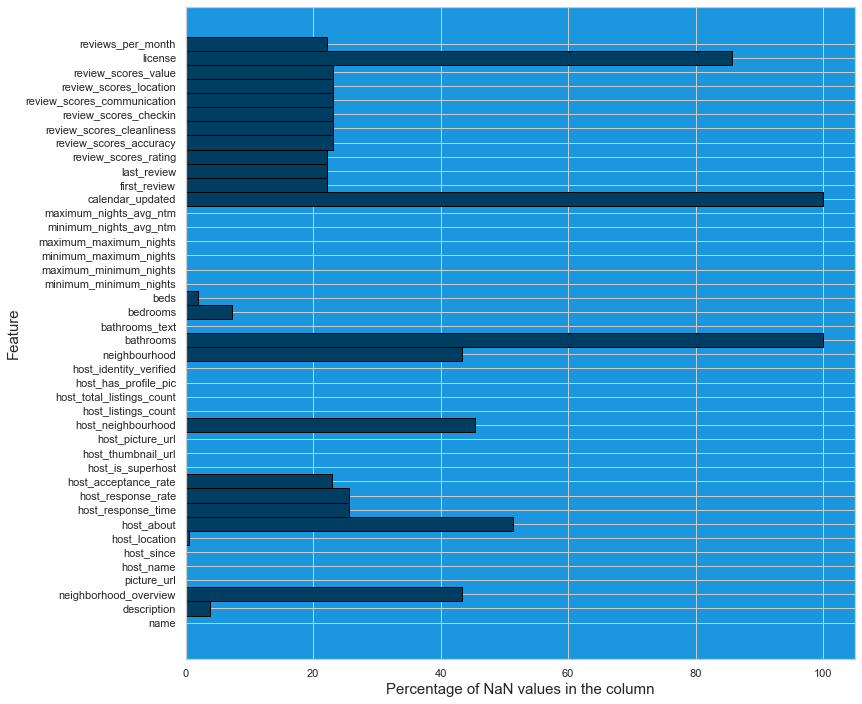

In [9]:
#How many Nan values do we have in our features of listing_df
a = get_null_info(listing_df)

In [10]:
#How many Nan features do we have in our calendar_df 
calendar_df.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    6
maximum_nights    6
dtype: int64

## 3.- *Data Preparation*

In [11]:
columns =  ['picture_url',  'listing_url', 'host_url',
       'host_thumbnail_url', 'host_picture_url','neighbourhood',
        'calendar_last_scraped','scrape_id','last_scraped','host_neighbourhood','neighborhood_overview',
         'host_listings_count']
listing_df.drop(columns, axis=1, inplace=True)

Now, lets fix some data type error and nomenclature

In [12]:
calendar_aux = calendar_df
calendar_aux['price'] = calendar_aux['price'].replace('[\$,]', '', regex=True).astype(float) 
calendar_aux['month'] = pd.DatetimeIndex(calendar_aux['date']).month

calendar_aux['available']= calendar_aux['available'].replace(['f'],0)
calendar_aux['available']= calendar_aux['available'].replace(['t'],1)

In [13]:
columns = ['host_response_rate', 'host_acceptance_rate']
for columns in columns:
    listing_df[columns] = listing_df[columns].str.extract(r'(\d+)')
    listing_df[columns] = listing_df[columns].astype('float').astype('Int64')


In [14]:
#Let's remove the dollar sign in front of the price
listing_df['price'] = listing_df.price.replace({'[\$,]':''}, regex=True).astype(float)

In [15]:
#And now change the t and f to 1 and 0 to treat is like a numeric variable
listing_df['host_is_superhost'] = listing_df['host_is_superhost'].replace(['t','f'],[1,0])
listing_df['instant_bookable'] = listing_df['instant_bookable'].replace(['t','f'],[1,0])

listing_df['host_is_superhost'] = pd.to_numeric(listing_df['host_is_superhost'])
listing_df['instant_bookable'] = pd.to_numeric(listing_df['instant_bookable'])




Drop the columns with more of the 50% of Nan values

In [16]:
listing_df = listing_df.dropna(thresh=listing_df.shape[0]*0.6,how='all',axis=1)

We will impute missing values for the deployment of the linear modelo, for now, lets work with this values

### Q1.- Is the quantity of accomation offer equal all arround Madrid?

In [17]:
data = listing_df 
data = data.groupby('neighbourhood_group_cleansed')['id'].count().reset_index()
total = data['id'].sum()
data['percent'] = (data['id']/total * 100).round(2)
data = data.sort_values(by=['percent'],ascending=False)

Text(0, 0.5, 'Percent')

<Figure size 432x288 with 0 Axes>

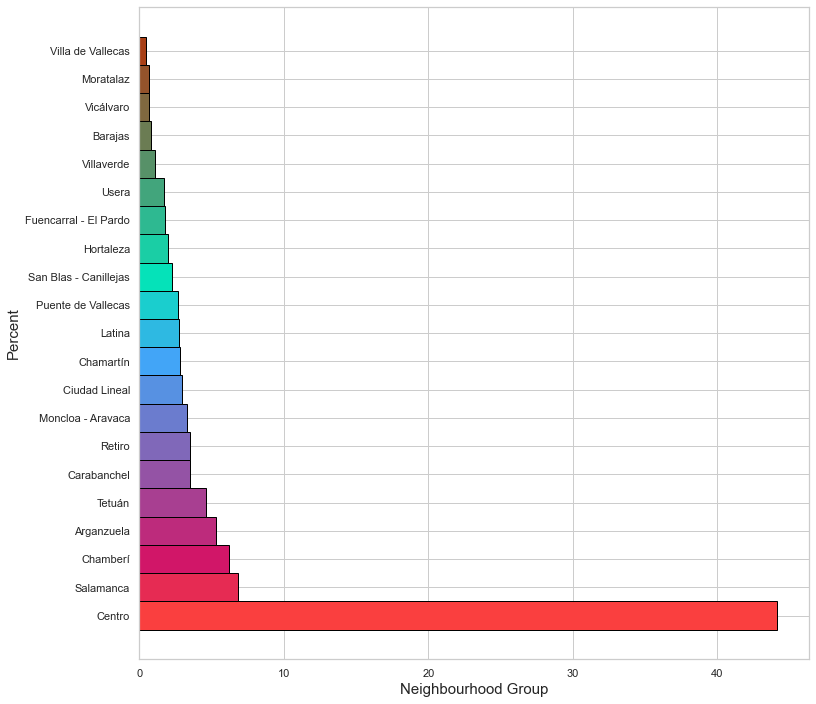

In [18]:
neighborhood_colors = create_colors(250/255,63/255,63/255,len(data),0.08)


fig = plt.figure();  # an empty figure with no Axes
fig, ax = plt.subplots();  # a figure with a single Axes
fig.set_figheight(12);
fig.set_figwidth(12);
    
plt.barh(y = data['neighbourhood_group_cleansed'],  width = data['percent'], height = 1,color=neighborhood_colors,edgecolor = 'black');
ax.set_xlabel('Neighbourhood Group', fontsize=15)
ax.set_ylabel('Percent', fontsize=15)




**Answer 1**:<br>
Each bar in the plot represents a neighborhood group in Madrid. The plot shows the percentage of accommodations in that neighborhood. For example, more than the 40% of the accommodations available in Airbnb Madrid are located in the neighborhood "Centro", which in English means the center of the city. So the answer to the questions is no. But, we have 2  features. First, we have a neighborhood group, and then we have a neighborhood. A neighborhood group is formed by some neighborhoods. This is important for the next question.


### Q2.- Does the feature neighbourhood group represent the quantity of offer of each of it's neighbourhoods?

We have to plot the same graphic of above, but this time for each neighbourhood. Each neighbourhood bar color is realted to the color of the neighbourhood group of the barh plot above. For the answer of this questions to be true, we should get the same rainbow pattern, if not, the answer will be no.

In [19]:
df1 = pd.DataFrame()
df1['neighbourhood_group'] = data['neighbourhood_group_cleansed']
df1['R'] = neighborhood_colors[:,0]
df1['G'] = neighborhood_colors[:,1]
df1['B'] = neighborhood_colors[:,2]

data2 = listing_df 
data2 = data2.groupby('neighbourhood_cleansed')['neighbourhood_group_cleansed'].count().reset_index()
total = data2['neighbourhood_group_cleansed'].sum()
data2['percent'] = (data2['neighbourhood_group_cleansed']/total * 100).round(2)


data2 = data2.sort_values(by=['percent'],ascending=False)

aux_3 =data2
aux_3 = aux_3.drop(columns = ['neighbourhood_group_cleansed'])
aux_3 = aux_3.sort_values(by=['neighbourhood_cleansed'])

data3 = listing_df 
data3 = data3.groupby('neighbourhood_cleansed')['neighbourhood_group_cleansed'].first().reset_index()
data3.info
data3['percent'] = aux_3['percent']
data3 = data3.sort_values(by=['percent'],ascending=False)

In [20]:
colores_2 = np.zeros((len(data3),3))
j = 0
cuenta = 0
for i in range(len(data3)):
    neighborhood_data3 = data3.iloc[i,1]
    for j in range(len(df1)):
        neighborhood_df1 = df1.iloc[j,0]
        if neighborhood_df1 == neighborhood_data3:
            colores_2[i,:] = [df1.iloc[j,1],df1.iloc[j,2],df1.iloc[j,3]]

        

Text(0, 0.5, 'Percent')

<Figure size 432x288 with 0 Axes>

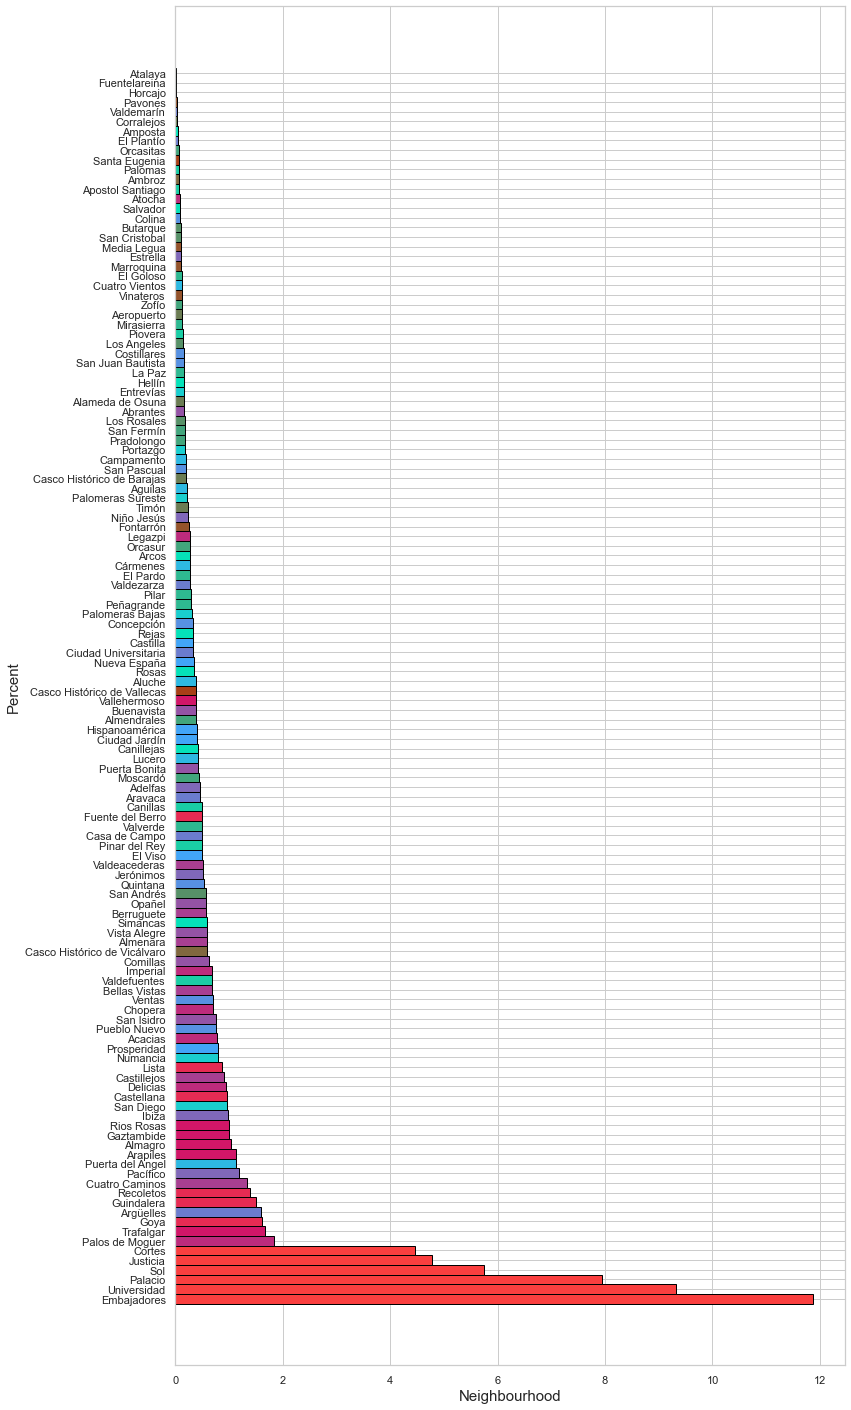

In [21]:
fig = plt.figure();  # an empty figure with no Axes
fig, ax = plt.subplots();  # a figure with a single Axes
fig.set_figheight(25);
fig.set_figwidth(12);
    
plt.barh(y= data2['neighbourhood_cleansed'],  width = data2['percent'], height = 1,color=colores_2,align='center',edgecolor = 'black');
ax.set_xlabel('Neighbourhood', fontsize=15)
ax.set_ylabel('Percent', fontsize=15)

**Answer 2**:<br>
Since we don't get the same rainbow pattern, the answer is no. However, each neighbourhood that belongs to the center zone has a lot to offer. So this answer will be true for the center zone only. The rest is divided into the rest of the neighbourhoods.


### Q3.- Are the prices equal all over Madrid?

In [22]:
q2 = listing_df 
q2 = q2.groupby('neighbourhood_group_cleansed')['price'].mean().reset_index()
q2 = q2.sort_values(by=['price'],ascending=False)
q2.head()

,neighbourhood_group_cleansed,price
15,San Blas - Canillejas,332.460497
18,Vicálvaro,219.648438
14,Salamanca,168.525564
8,Hortaleza,139.987013
10,Moncloa - Aravaca,137.935636


In [23]:
colores_3 = np.zeros((len(q2),3))
j = 0

for i in range(len(q2)):
    neighborhood_dataq2 = q2.iloc[i,0]
    for j in range(len(df1)):
        neighborhood_df1 = df1.iloc[j,0]
        if neighborhood_df1 == neighborhood_dataq2:
            colores_3[i,:] = [df1.iloc[j,1],df1.iloc[j,2],df1.iloc[j,3]]

        


Text(0, 0.5, 'Neighbourhood Group')

<Figure size 432x288 with 0 Axes>

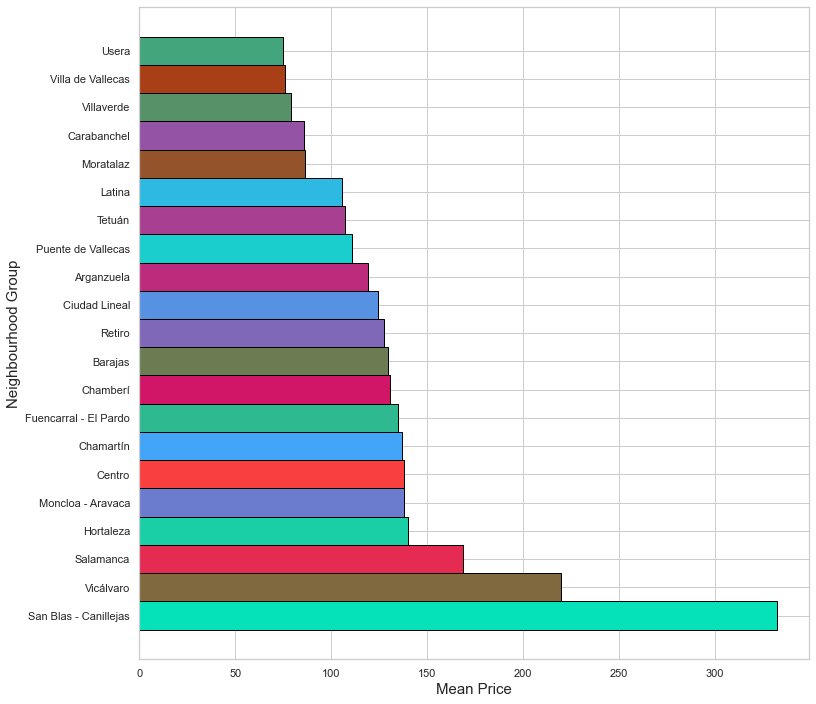

In [24]:
fig = plt.figure();  # an empty figure with no Axes
fig, ax = plt.subplots();  # a figure with a single Axes
fig.set_figheight(12);
fig.set_figwidth(12);
    
plt.barh(y = q2['neighbourhood_group_cleansed'],  width = q2['price'], height = 1,color=colores_3,edgecolor = 'black');
ax.set_xlabel('Mean Price', fontsize=15)
ax.set_ylabel('Neighbourhood Group', fontsize=15)


<AxesSubplot:xlabel='price', ylabel='neighbourhood_group_cleansed'>

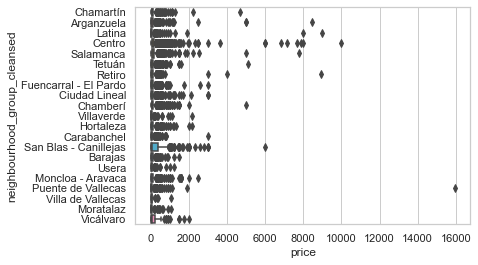

In [25]:
sns.boxplot(y='neighbourhood_group_cleansed', x='price', data=listing_df)
# Theres a lot of outliers...

In [26]:
q2_2 = listing_df[listing_df['price'] <= 600].sort_values('neighbourhood_group_cleansed')

<Figure size 432x288 with 0 Axes>

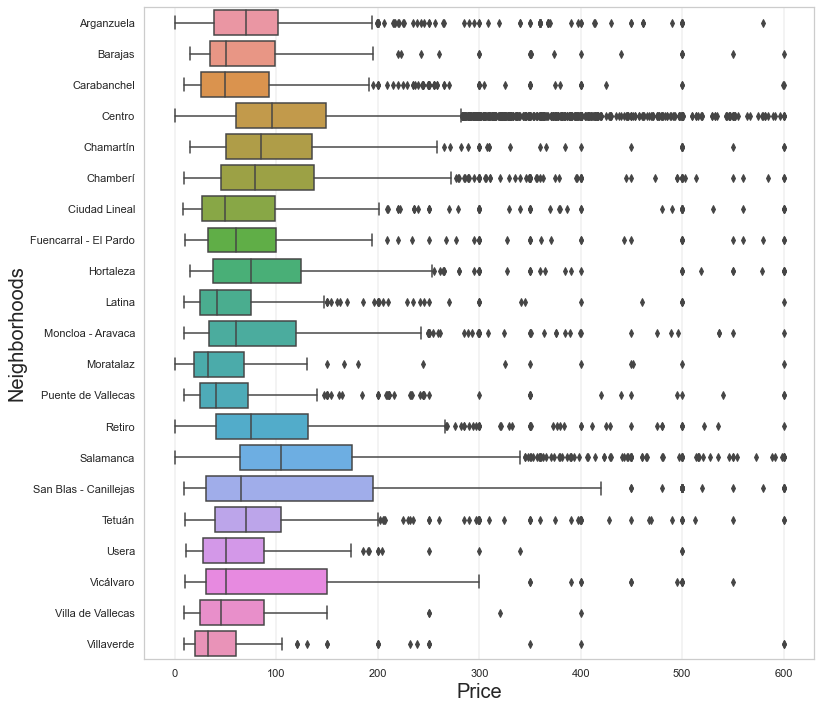

In [27]:
fig = plt.figure();  # an empty figure with no Axes
fig, ax = plt.subplots();  # a figure with a single Axes
fig.set_figheight(12);
fig.set_figwidth(12);
ax =sns.boxplot(y='neighbourhood_group_cleansed', x='price', data=q2_2)
ax.set_xlabel('Price', fontsize=20)
ax.set_ylabel('Neighborhoods', fontsize=20)
ax.grid(axis='x', linewidth=0.45)

**Answer 3**:<br>

The prices are not equal all around Madrid. Based on the first bar plot, we can see that the mean price of the accommodation depends a lot on the neighborhood group. We can also see, thanks to the box plot, that the range of prices is different for different neighbourhood groups in Madrid.



### Q4.- How are the prices and availability rate in Madrid over the months?

In [28]:
calendar_aux = calendar_df
data_calendar = calendar_aux.groupby('month')['available'].mean().reset_index()
data_calendar2 = calendar_aux.groupby('month')['price'].mean().reset_index()

<Figure size 432x288 with 0 Axes>

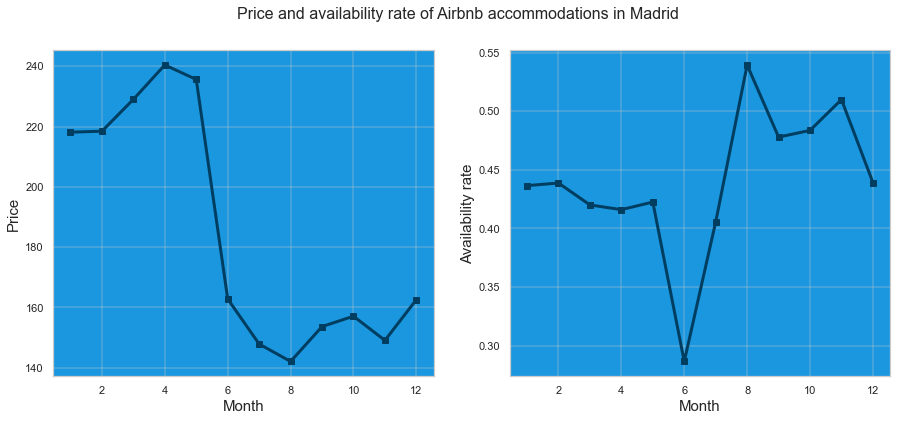

In [29]:
fig = plt.figure();  # an empty figure with no Axes
fig, ax = plt.subplots(1,2);  # a figure with a single Axes
fig.set_figheight(6);
fig.set_figwidth(15);

fig.suptitle('Price and availability rate of Airbnb accommodations in Madrid', fontsize=16)

ax[0].plot(data_calendar2['month'],data_calendar2['price'],linewidth=3, color=(0/255,62/255, 97/255),marker='s')
ax[0].set_facecolor((27/255,151/255, 223/255))
ax[0].set_xlabel('Month', fontsize=15)
ax[0].set_ylabel('Price', fontsize=15)
ax[0].grid(axis='both', linewidth=0.45)

ax[1].plot(data_calendar['month'],data_calendar['available'],linewidth=3, color=(0/255,62/255, 97/255),marker='s')
ax[1].set_facecolor((27/255,151/255, 223/255))
ax[1].set_xlabel('Month', fontsize=15)
ax[1].set_ylabel('Availability rate', fontsize=15)
ax[1].grid(axis='both', linewidth=0.45)



**Answer 4**:<br>

We can see that the prices and availability rate seem to be dependent on the month. People seem to visit Madrid more in the winter and spring months. This can be due to the hot weather Madrid experiences in the summer months. The month with the highest availability rate is also the cheapest. This can be caused by the offer and demand effect.



### Q5.- How well can we predict the price based on the rest of the feautures??

Let's create a model that, depending in other features, estimate the price of the accomodation. Then, we evaluate it and see if it's possoble to predict the price of an accomodation based on other features

## 4.- *Data Modelling*

In [30]:
# First, let's drop all the rows with no price info, since it's what we are trying to predict
listing_df = listing_df.dropna(axis = 0, subset = ['price'],how = 'any')

In [31]:
# Get some info about the distribution of the prices
price_description = listing_df['price']
price_description.describe()

count    19446.000000
mean       135.447856
std        313.584373
min          0.000000
25%         45.000000
50%         82.000000
75%        138.000000
max      15960.000000
Name: price, dtype: float64

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

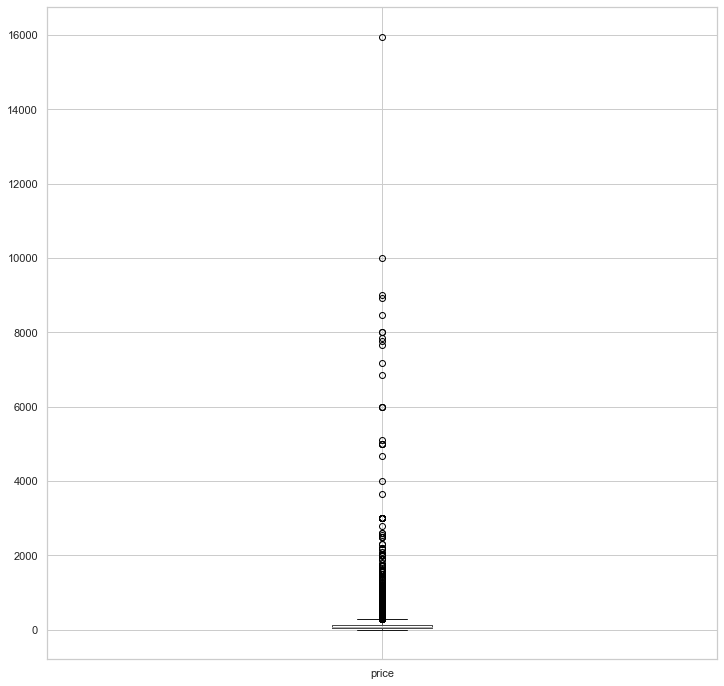

In [32]:
# Here, we can clearly see that there are lot's of outliers...
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots();  # a figure with a single Axes
fig.set_figheight(12)
fig.set_figwidth(12)
listing_df.boxplot(column= ['price'])
    


In [33]:
# We create the model for the "normal" situations, if we consider all the outliers, the model will be imprecise
listing_df = listing_df[listing_df['price'] < 390]


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

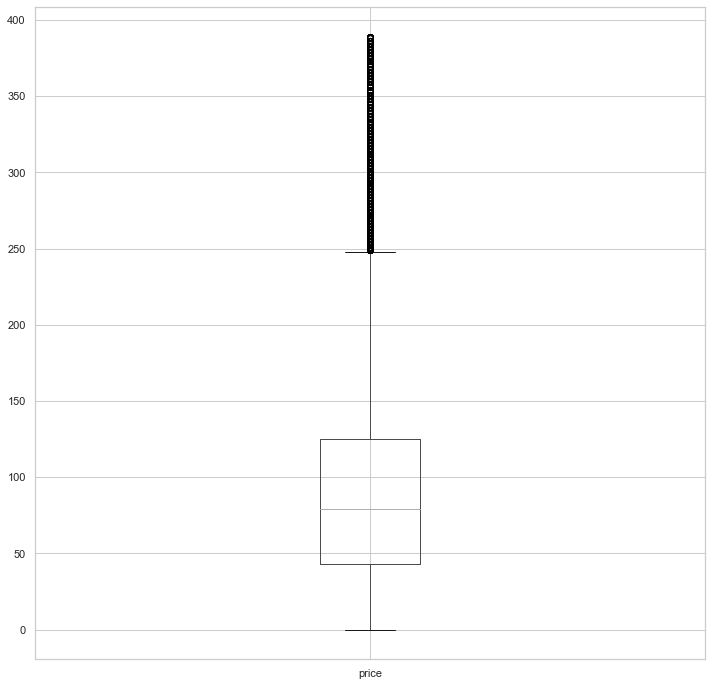

In [34]:
# There are lot's of outliers, but it's okay, this is much better
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig.set_figheight(12)
fig.set_figwidth(12)
listing_df.boxplot(column= ['price'])
    

First, I create a model only using numerical features, later I will include categorical features and see if this makes a difference

In [35]:
num_df = listing_df.select_dtypes(include=['int64','float64'])

In [36]:
num_df.head()

,id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,13660,100,84,0.0,1.0,40.45724,-3.67688,2,1.0,1.0,69.0,3,1125,1.0,21.0,8.0,1125.0,6.0,1122.5,5,12,22,92,95,17,3,4.86,4.90,4.81,4.74,4.84,4.82,4.84,0,1,0,1,0,0.64
1,336672,1716726,100,98,1.0,5.0,40.39516,-3.69309,6,4.0,4.0,106.0,3,35,1.0,3.0,1125.0,1125.0,1.7,1125.0,4,18,41,41,82,25,4,4.82,4.82,4.62,4.80,4.94,4.80,4.76,0,5,1,4,0,1.50
2,21853,83531,<NA>,0,0.0,2.0,40.40381,-3.74130,1,1.0,1.0,31.0,4,40,4.0,4.0,40.0,40.0,4.0,40.0,0,5,35,310,33,0,0,4.58,4.72,4.56,4.75,4.82,4.21,4.67,0,2,0,2,0,0.35
3,336834,1713427,100,89,0.0,1.0,40.42242,-3.69562,5,2.0,3.0,65.0,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,0,7,7,7,46,2,0,4.62,4.75,4.25,4.86,4.77,4.95,4.60,0,1,1,0,0,0.37
4,23001,82175,100,74,0.0,9.0,40.38840,-3.69511,6,3.0,3.0,46.0,15,730,15.0,15.0,730.0,730.0,15.0,730.0,8,33,63,319,1,1,0,5.00,5.00,4.00,5.00,5.00,4.00,5.00,0,7,7,0,0,0.30


In [37]:
num_df.isnull().sum()

id                                                 0
host_id                                            0
host_response_rate                              4501
host_acceptance_rate                            3917
host_is_superhost                                 27
host_total_listings_count                         27
latitude                                           0
longitude                                          0
accommodates                                       0
bedrooms                                        1349
beds                                             359
price                                              0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             1
maximum_minimum_nights                             1
minimum_maximum_nights                             1
maximum_maximum_nights                             1
minimum_nights_avg_ntm                        

*Imputate null values with their mean*

In [38]:
int_fillmean = lambda x: x.fillna(round(x.mean()))
num_df = num_df.apply(int_fillmean, axis=0)

In [39]:
X = num_df.drop(columns = ['price'])
y = num_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)



#Four steps:

#Instantiate

lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

#Predict
#Score
y_test_preds = lm_model.predict(X_test) 
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

C:\Users\Carbonero\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


'The r-squared score for your model was 0.44348746699884045 on 5556 values.'

In [40]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [41]:
# This are the weigths of the coefficients
coef_df = coef_weights(lm_model.coef_, X_train)
coef_df.head(20)

,est_int,coefs,abs_coefs
6,latitude,125.291300,125.291300
31,review_scores_location,29.746721,29.746721
7,longitude,-19.466494,19.466494
8,accommodates,16.946961,16.946961
4,host_is_superhost,10.757132,10.757132
33,instant_bookable,10.594785,10.594785
9,bedrooms,9.648689,9.648689
28,review_scores_cleanliness,9.375080,9.375080
30,review_scores_communication,-7.703041,7.703041
37,calculated_host_listings_count_shared_rooms,-6.625172,6.625172


Now, let's inclue categorical variables and see if this improve the performance of the model

In [42]:
cat_df = listing_df.select_dtypes(include=['object'])

In [43]:
cat_df.columns

Index(['name', 'description', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'has_availability', 'first_review',
       'last_review'],
      dtype='object')

In [44]:
#Let's select the most interesting features...
cat_2_df = cat_df[['neighbourhood_group_cleansed','bathrooms_text','room_type','host_response_time','room_type']]

*We create the dummy variables through this function that also takes care of the missing values*

In [45]:
data_cat_dum = create_dummy_df(cat_2_df, cat_2_df.columns, dummy_na = False)

In [46]:
data_concat = pd.concat([num_df, data_cat_dum],axis = 1)

In [47]:
X = data_concat.drop(columns = 'price')
y = data_concat['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit - why does this break?
lm_model.fit(X_train, y_train) 

y_test_preds = lm_model.predict(X_test) 
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)


C:\Users\Carbonero\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


## 5.- *Result evaluation*

In [48]:
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was 0.5233911477683991 on 5556 values.'

**Answer 5**:<br>
Since the value of the r-square is 0.5234 we cannot say that we can predict or estimate the price of an accomodating based on the other selected features. A r-square of 0.75 or more will be enougth.
